In [6]:
import wandb
import pandas as pd

api = wandb.Api()

project = 'tiny_stories_saes'
entity = 'hustcollab'

runs = api.runs(f"{entity}/{project}")
data = []

for run in runs:
    expansion_factor = run.config.get("expansion_factor", None)
    l1_coef = run.config.get("l1_coefficient", None)
    final_l0_norm = run.summary.get("metrics/l0", None)
    final_l2_loss = run.summary.get("losses/mse_loss", None)
    final_ce_loss_score = run.summary.get("model_performance_preservation", None)['ce_loss_score']
    data.append({
        'expansion_factor': expansion_factor,
        'l1_coef': l1_coef,
        "l0_norm": final_l0_norm,
        "mse": final_l2_loss,
        "ce_loss_score": final_ce_loss_score
    })

df = pd.DataFrame(data)
print(df)

   expansion_factor  l1_coef     l0_norm         mse  ce_loss_score
0                 8        4  250.905029  204.215912       0.899648
1                 8        5  207.414062  219.442841       0.885865
2                 8        6  179.760986  233.157288       0.873706
3                 8        7  157.552490  247.130630       0.862946
4                 8        8  138.165039  261.387390       0.853254
5                 8       16   63.248535  361.949524       0.777070


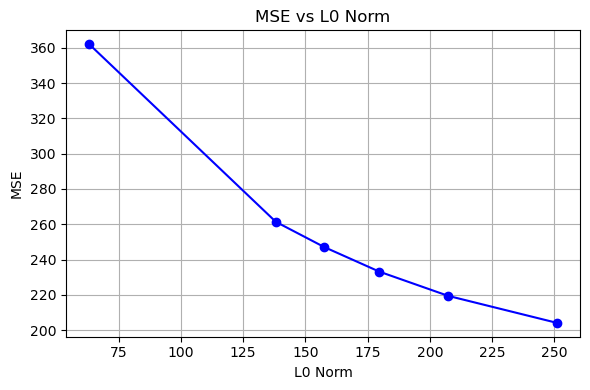

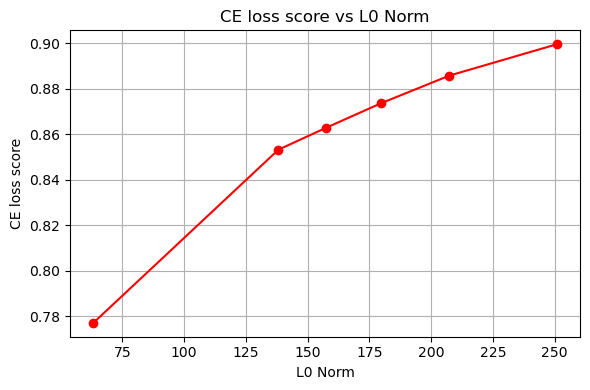

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(6, 4))
# Plot 1: MSE vs L0 norm
ax1.plot(df['l0_norm'], df['mse'], marker='o', linestyle='-', color='b')
ax1.set_title('MSE vs L0 Norm')
ax1.set_xlabel('L0 Norm')
ax1.set_ylabel('MSE')
ax1.grid(True)
plt.tight_layout()
plt.show()

fig, ax2 = plt.subplots(figsize=(6, 4))
# Plot 2: CE loss score vs L0 norm
ax2.plot(df['l0_norm'], df['ce_loss_score'], marker='o', linestyle='-', color='r')
ax2.set_title('CE loss score vs L0 Norm')
ax2.set_xlabel('L0 Norm')
ax2.set_ylabel('CE loss score')
ax2.grid(True)
plt.tight_layout()
plt.show()